In [1]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [2]:
fetch_housing_data()

In [3]:
# import the data using pandas into this notebook 
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()
# we can see that we have 20,640 rows
# total_bedrooms has some missing data which we will need to adress later 
# every column is numerical except for ocean_proximity

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
# 25% of the districts have a housing_median_age lower than
# 18, while 50% are lower than 29 and 75% are lower than 37

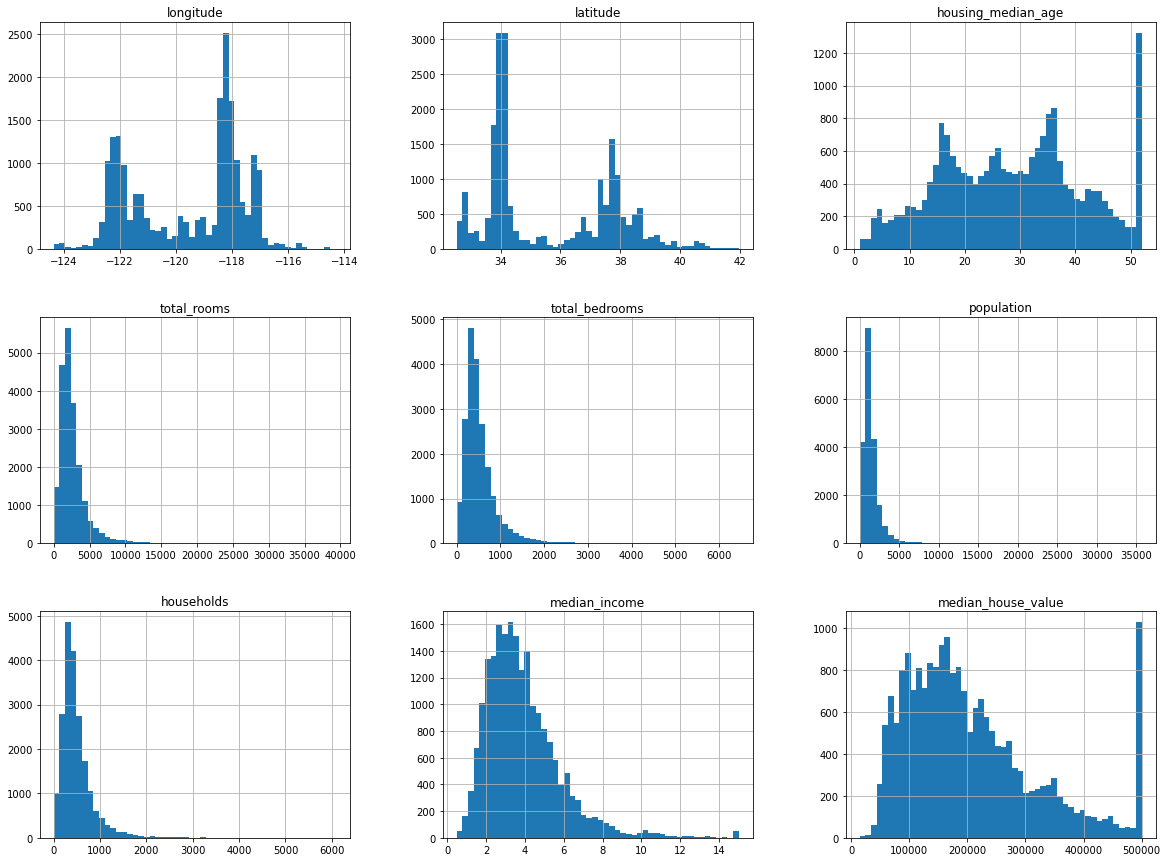

In [8]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# another way to get the distribution of housing data is through histograms 
# intervals of 50 districts
housing.hist(bins = 50, figsize = (20,15))
plt.show()

### observations
1. median_income is computed in tens of thousands 

2. we can see that the median housing data and the median housing age are capped
     2. this can be a problem since we are trying to guess the median housing value
     2. what if we need to predict housing values beyond 500k, our model will never get that exposure
     
3. we have a lot of data skewed to the right which will be difficult for the model
    3. we will need to preprocess this data to make it easier to for the model to interpret
4. finally, the attributes all have different scales (look at the x axes)

In [9]:
# now we need to split the data and create a test set
# don't look at it because it will give the data snooping bais

from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

# now our data is split into a training and test set (80 to 20 ratio)
# random state parameter allows us to reproduce the same results for someone else using the same data 

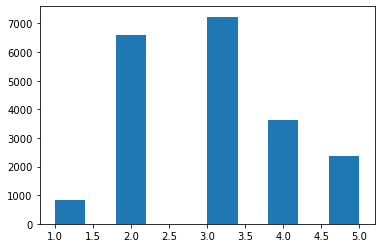

In [10]:
# looking at the medium income hist, we can see much of the data is between 1.5 and 4.0, roughly
# we can create a new column that distributes the data more evenly
# this is called stratifiying the data, each bin represents a different 'stratum'
housing["income_cat"] = pd.cut(housing["median_income"],
 bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
 labels=[1, 2, 3, 4, 5])

plt.hist(housing['income_cat'])
plt.show()

## why use stratified?
1. Stratified Sampling Definition: 
    1. a sample that is drawn from a number of separate strata of the population, rather than at random from the whole population, in order that it should be representative.
    1. Stratified random sampling is a method of sampling that involves the division of a population into smaller sub-groups known as strata. In stratified random sampling, or stratification, the strata are formed based on members' shared attributes or characteristics such as income or educational attainment.
2. Stratified sampling show us the different groups of the sample so we know the test sample isn't random

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [12]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [13]:
# we can drop this column now in the training and testing datasets
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

## It's time to get a bit deeper into the data visualization/insights

In [14]:
# it is important that you only look at the training set, and not the testing set for snooping reasons
# create a copy so that nothing is damaged in the real training set
housing = strat_train_set.copy()
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

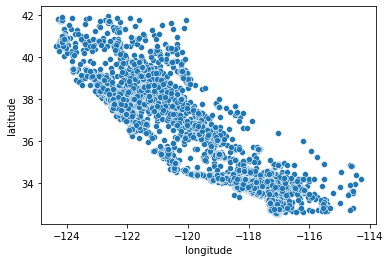

In [15]:
# let's take a look at geographical data
import seaborn as sns
sns.scatterplot(x= housing.longitude, y= housing.latitude)
plt.show()

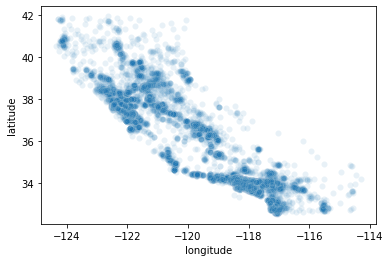

In [16]:
# okay pretty cool, it looks like California
# let's change the alpha so we can see which parts are dense
sns.scatterplot(x= housing.longitude, y= housing.latitude, alpha = 0.1)
plt.show()

There is a pretty good amount of density along the coast and a bit inland from those areas <br> I wonder if those places will have higher median prices <br> We can take a look at this by adding filters to the scattered data such as population and median_house_value

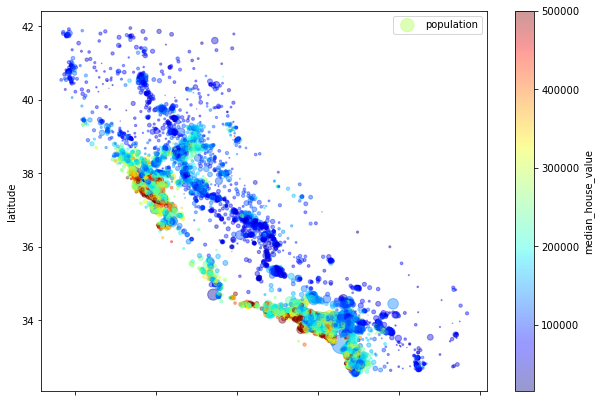

In [17]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
 s=housing["population"]/100, label="population", figsize=(10,7),
 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

WOW! What do you know, our curiosity paid off!! and we were correct. More expensive houses are commonly seen in the denser areas. <br> We can also see that the most expensive housing are closer to the ocean

## we can look at correlations now between the data 

In [18]:
correlation_matrix = housing.corr()
# show the correlation to each numeric data in relation to median_house_value
correlation_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

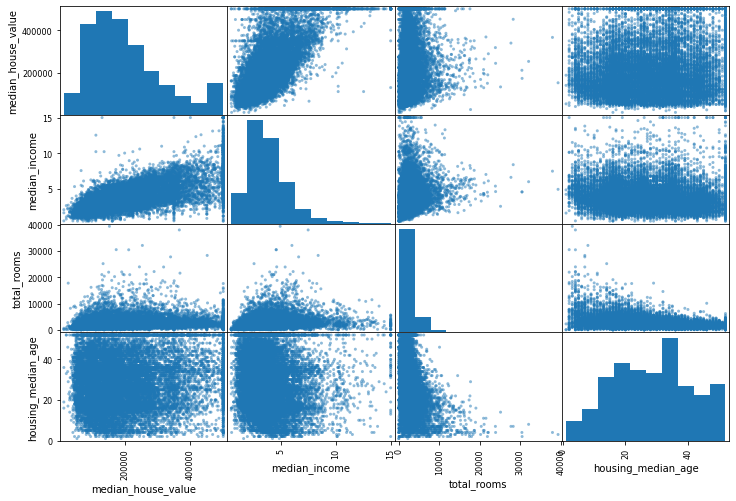

In [19]:
# another way to observe the correlations is visually
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
 "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

## insights
1. Immediately we can see that the median income and median house value have a nice correlation
2. In relation to total rooms, there is a lot of clutter with the lower number of rooms
    2. Maybe taking off some of the extreme values will create a better visual of the correlation
3. overall these visuals show many of the variables in their current state are not correlated well

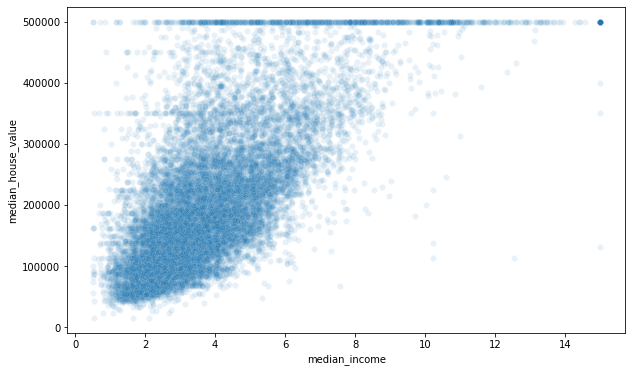

In [20]:
# zoom into the correlated data between income and price
plt.figure(figsize = (10,6))
sns.scatterplot(x= housing.median_income, y = housing.median_house_value, alpha = 0.1)
plt.show()

### insights
1. We can clearly see a strong correlation
2. We can also see the clear horizontal line represented by the capped data at 500k
3. There are other slightly, less noticeable horizontal linez around the 450k, 350k, and 280k marks
    3. These might be useful to remove so that the ML model doesnt reproduce the same kind of quirks

## Combine attributes
Another way to visualize and understand the data is to combine attributes that may have some correlations that dont exist in the raw data 
1. rooms/ household
2. bedrooms/ room
3. population/ household

In [21]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [22]:
# now lets look at the correlations with the new columns we made 
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

## insights
1. rooms per houshold shows up as one of the more correlated data
2. strongish negative correlation between bedrooms per room and median house value

# Now we are ready to prepare the data for the Machine Learning Model !!!

It’s time to prepare the data for your Machine Learning algorithms. Instead of just
doing this manually, you should write functions to do that, for several good reasons:
1.  This will allow you to reproduce these transformations easily on any dataset (e.g.,
the next time you get a fresh dataset).
2. You will gradually build a library of transformation functions that you can reuse
in future projects.
3. You can use these functions in your live system to transform the new data before
feeding it to your algorithms.
4. This will make it possible for you to easily try various transformations and see
which combination of transformations works best

In [23]:
# get some fresh clean data 
housing = strat_train_set.drop('median_house_value', axis = 1)
housing_labels = strat_train_set['median_house_value'].copy()
print(housing_labels.shape)

(16512,)


### Data Cleaning 
1. ML models cannot work with missing data 
2. We noticed earlier that the total bedrooms feature has some missing values, lets rid of those
    2. fillna() --> we can fill the null values w sum like median, mean, 0
    2. drop() --> which will drop the entire column
    3. dropna() where we can drop the null values 
3. We can also use ```SimpleImputer``` from Sklearn to automatically impute these values
     <br><t> **The simple imputer only works on numerical data 

In [24]:
housing.total_bedrooms.isna().count()

16512

In [25]:
# lets impute those empty bedroom cells with median values 
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [26]:
# we can only use the imputer on numeric data 
housing_num = housing.drop('ocean_proximity', axis = 1)

In [27]:
# now we can fit/ transform the imputer to the numerical data 
imputer.fit(housing_num)
X = imputer.transform(housing_num)

In [28]:
# place the transformed Numpy array back into a df
housing_tr = pd.DataFrame(X, columns=housing_num.columns)
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
...,...,...,...,...,...,...,...,...
16507,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312
16508,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682
16509,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723
16510,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625


We have done a great job imputing the numerical data, but what about the categorical 'ocean_priximity'? <br>
We will need to encode the different types of ocean_proximity into numbers for the ML model

In [29]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


In [30]:
from sklearn.preprocessing import OneHotEncoder
one_hot= OneHotEncoder()
housing_cat_1hot = one_hot.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

Storing the data in a sparse matrix saves a lot of memory space, as it only returns the rows that contain nonzero values <br> This is very useful when you might have thousands of possible categories

In [31]:
# we still have our categories_
one_hot.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## Custom Transformer
1. Remember that ```X``` is our transformed numerical data
2. We are adding ```BaseEstimator``` and ``` TransformerMixin``` to do some general/base operations
3. Make ``` add_bedrooms_per_room``` unique so we can see if it is relevant to the model
    3. Remember that it had a decent negative correlation when we did it manually, so we can see if its actually important 
4. Simply fit ```X``` and set ``` y = None```
5. Then we need to ```transform``` which really just creates the new attributes, but we can see if ``` add_bedrooms_per_room``` is important by changing it from ```True``` to ```False```
6. Instantiate and excecute the class 

In [32]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
            bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

## Pipeline 
1. Pipelines are useful for facilitating preprocessing 
2. They allow for imputing, scaling, fitting and transforming data
3. We can first create numeric and categorial pipelines and then
4. We can take those and place them into a larger, CustomTransformer pipeline for the entire training data set


In [33]:
# 1. impute
# 2. Transform
# 3. Scale

# numerical pipeline 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline ([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
    ])
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [34]:
# for the categorical pipeline, we can just place our categorical row into the full pipeline
# OneHotEncode the cat data
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs),
    ])
housing_prepared = full_pipeline.fit_transform(housing)

## Now we can finally select and train our model !!!11!11!!1

In [35]:
# Linear Regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [36]:
# now the data is fit, so we can look at its accuracy in sum sample data 
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print('predictions: ', lin_reg.predict(some_data_prepared))
print('labels: ', list(some_labels))

predictions:  [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
labels:  [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [37]:
# now know how our linear regression model works, so we can take a look at the error for the entire training data 
# use the linear model to predict our housing data. DO NOT use labels when .predicting

# we are going to use the mean sq error metric to measure performance 
# then we need to get the sqrt of the MSE

from sklearn.metrics import mean_squared_error
lin_predictions = lin_reg.predict(housing_prepared)

lin_mse = mean_squared_error(housing_labels, lin_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

### Insights
- It is pretty bad that our model is off by almost 69k, but hey at least it works >.<
- That is not very reliable when trying to predict housing values
<br> 

- Lets try a Tree model and see how it does 

In [38]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [39]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

### Insights 
- 0.0 means no error, aka we overfit the our data 
- lets use some cross validation to look more into this 
    - one way to evaluate is to use a train_test_split 
        - splits the data into two sets (train and test) and then runs
    - another is to use kfold cross validation
        - kfold will place the total data into k number of folds and run a model k times on it
        - gives array of evaluation scores 

In [40]:
from sklearn.svm import SVR
svr_model = SVR(kernel= 'poly', C= 4.4, gamma = 'auto')
svr_model.fit(housing_prepared, housing_labels)
svr_predictions = svr_model.predict(housing_prepared)

svr_mse = mean_squared_error(housing_labels, svr_predictions)
svr_rmse = np.sqrt(svr_mse)
svr_rmse

118102.28861025894

In [41]:
from sklearn.model_selection import cross_val_score

# gather the cross_val scores from prepared data and labels, cv = 10
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [42]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(tree_rmse_scores)

Scores: [67789.6518699  66258.10565278 72699.60764225 69926.44176955
 69677.01142194 74173.19909838 70513.84819537 71948.03046301
 76082.66858356 69412.58315132]
Mean: 70848.11478480537
Standard deviation: 2791.243596604465


In [43]:
# look at linear regression cross_val scores 
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard deviation: 2731.6740017983507


## Let's try one last model: Random Forest Regressor

In [44]:
from sklearn.ensemble import RandomForestRegressor

In [45]:
# establish
# fit
# predict
# evaluate
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, 
                                scoring = 'neg_mean_squared_error', cv=2 )


In [46]:
# evaluate and display
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [52109.22747307 52116.49308273]
Mean: 52112.860277899934
Standard deviation: 3.6328048289215076


## Grid Search 
- used to evaluate different hyperparameters for your model
- doing this manually can be pretty tedious and time consuming for a yrn
- we just tell it which hyperparameters to evaluate and what specific values
- it searches for the best hyperparameters


In [47]:
from sklearn.model_selection import GridSearchCV

param_grid = [
 {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, # 3 x 4 = 12 combinations of estimators/features
 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},# 2 x 3 = 6 combinations
 ]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
     scoring='neg_mean_squared_error',return_train_score=True)

grid_search.fit(housing_prepared, housing_labels) # grid search fit the housing data and labels

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

This param_grid tells Scikit-Learn to first evaluate all 3 × 4 = 12 combinations of
n_estimators and max_features hyperparameter values specified in the first dict
(don’t worry about what these hyperparameters mean for now; they will be explained
in Chapter 7), then try all 2 × 3 = 6 combinations of hyperparameter values in the
second dict, but this time with the bootstrap hyperparameter set to False instead of
True (which is the default value for this hyperparameter).

In [48]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [49]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [50]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63042.488060191565 {'max_features': 2, 'n_estimators': 3}
55752.104658187 {'max_features': 2, 'n_estimators': 10}
52597.42483401293 {'max_features': 2, 'n_estimators': 30}
60405.39170099453 {'max_features': 4, 'n_estimators': 3}
52865.171826032565 {'max_features': 4, 'n_estimators': 10}
50445.20423089769 {'max_features': 4, 'n_estimators': 30}
59722.374845903476 {'max_features': 6, 'n_estimators': 3}
51827.49899655817 {'max_features': 6, 'n_estimators': 10}
50017.109411773825 {'max_features': 6, 'n_estimators': 30}
59036.979324087035 {'max_features': 8, 'n_estimators': 3}
51651.786074979944 {'max_features': 8, 'n_estimators': 10}
49961.43670727919 {'max_features': 8, 'n_estimators': 30}
62415.35344608945 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54148.82622330476 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60051.05513418861 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52883.2665360992 {'bootstrap': False, 'max_features': 3, 'n_estimators':

In [51]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.82689674e-02, 6.23260742e-02, 4.31258259e-02, 1.50674109e-02,
       1.47449467e-02, 1.54310464e-02, 1.35966652e-02, 3.70976794e-01,
       4.13249923e-02, 1.13329648e-01, 7.49650162e-02, 5.32929622e-03,
       1.54756133e-01, 1.28116361e-04, 3.28532377e-03, 3.34374367e-03])

In [52]:
# display the importance scores next to their attribute names
# shows us which data is important in the models success
# consider dropping the weak importance
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3709767942980635, 'median_income'),
 (0.15475613264646132, 'INLAND'),
 (0.11332964795211595, 'pop_per_hhold'),
 (0.07496501616870581, 'bedrooms_per_room'),
 (0.06826896744192552, 'longitude'),
 (0.06232607424167876, 'latitude'),
 (0.04312582587066271, 'housing_median_age'),
 (0.04132499228979189, 'rooms_per_hhold'),
 (0.015431046399595715, 'population'),
 (0.015067410852105638, 'total_rooms'),
 (0.014744946664532504, 'total_bedrooms'),
 (0.013596665154710984, 'households'),
 (0.005329296224216672, '<1H OCEAN'),
 (0.0033437436681199003, 'NEAR OCEAN'),
 (0.0032853237661253287, 'NEAR BAY'),
 (0.00012811636118778658, 'ISLAND')]

In [53]:
# use a grid search to find your final model for you 
final_model = grid_search.best_estimator_

# set the testing variables, same as when we did the train
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test
# # do not fit the data, only transform
X_test_prepared = full_pipeline.transform(X_test)

# # evaluate error 
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

48680.88212195146

In [54]:
from scipy import stats
# 95% confidence error
confidence = 0.95

squared_errors = (final_predictions - y_test) ** 2

np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
loc=squared_errors.mean(),
scale=stats.sem(squared_errors)))

array([46631.77543524, 50647.15281336])

## Exercises 

1. Try a Support Vector Machine regressor (sklearn.svm.SVR), with various hyperparameters such as kernel="linear" (with various values for the C hyperparameter) or kernel="rbf" (with various values for the C and gamma hyperparameters). 
    1. Don’t worry about what these hyperparameters mean for now.
2. How does the best SVR predictor perform?

3. Try replacing GridSearchCV with RandomizedSearchCV.
4. Try adding a transformer in the preparation pipeline to select only the most important attributes.
5. Try creating a single pipeline that does the full data preparation plus the final prediction.
6. Automatically explore some preparation options using GridSearchCV